# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = "../../data/"

# Data

In [13]:
df_radiomics = pd.read_excel(data_path + 'quantitative_radiomic_features.xls')
df_radiomics['Lesion Name'] = df_radiomics['Lesion Name'].str.replace(r'-1\.les|-S2-1\.les', '', regex=True)

target_class = pd.read_csv(data_path + 'target_class.csv')
target_class.rename(columns={'CLID': 'Lesion Name'}, inplace=True)

In [17]:
data = pd.merge(df_radiomics, target_class, on='Lesion Name', how='inner')
data

,Lesion Name,Maximum enhancement (K1),Time to peak (K2),Uptake rate (K3),Washout rate (K4),Curve shape index (K5),E1 (K6),Signal Enhancement Ratio (SER) (K7),Maximum enhancement-variance (E1),Enhancement-Variance Time to Peak (E2),...,Margin Sharpness (M1),Variance of Margin Sharpness (M2),Variance of Radial Gradient Histogram (vRGH) (M3),Size/Lesion volume (S1),Effective Diameter (S2),Surface Area (S3),Surface Area to Volume ratio (G3),Volume of most enhancing voxels (S4),Maximum Diameter (S5),Pam50.Call
0,TCGA-AO-A03M,1.602573,145.433,0.011019,0.000809,-0.099998,1.550204,1.111109,0.125963,60.000,...,0.188643,0.000143,0.014881,3139.6540,18.16747,2897.7040,0.922937,22.15705,27.60382,LumA
1,TCGA-AO-A03V,4.072152,144.752,0.028132,0.001510,-0.007311,3.973258,1.007365,4.054312,229.504,...,0.266607,0.000371,0.011217,1122.5800,12.89455,953.7904,0.849641,111.70860,21.31066,LumA
2,TCGA-AO-A0J9,1.303264,168.383,0.007740,0.000667,-0.146959,1.273733,1.172277,0.534411,60.000,...,0.269997,0.000323,0.005211,8211.5000,25.03079,6920.3380,0.842762,236.23630,41.33787,LumA
3,TCGA-AO-A0JI,0.758630,60.000,0.012644,0.000479,-0.150482,0.758630,1.177138,0.037956,298.418,...,0.179068,0.000407,0.020553,569.5309,10.28426,585.4972,1.028034,122.69640,11.39449,LumA
4,TCGA-AO-A0JM,3.353556,60.000,0.055893,0.000920,-0.080066,3.353556,1.087034,2.330160,60.000,...,0.314553,0.000409,0.004073,19709.4700,33.51394,18107.5700,0.918724,245.36130,68.62797,LumB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,TCGA-E2-A15M,1.277688,60.000,0.021295,0.000611,-0.149392,1.277688,1.175629,0.271695,60.000,...,0.235470,0.002210,0.006303,6066.8380,22.62844,5934.5540,0.978195,94.23584,51.20215,LumA
72,TCGA-E2-A1B5,1.495674,60.000,0.024928,0.000093,-0.017541,1.495674,1.017854,0.123041,60.000,...,0.218222,0.000760,0.010302,1419.0820,13.94236,1621.7530,1.142819,88.69263,22.50068,LumA
73,TCGA-E2-A1B6,2.182750,60.000,0.036379,0.001081,-0.125678,2.182750,1.143744,0.225339,313.733,...,0.195256,0.000169,0.007831,5328.3800,21.67033,3618.5270,0.679105,89.18701,30.87951,Basal
74,TCGA-E2-A1IE,1.354828,192.786,0.007028,0.000067,0.043301,1.290058,0.958496,0.108778,60.000,...,0.211480,0.000169,0.014482,2196.5620,16.12804,2166.4220,0.986278,36.73828,23.13763,LumA


# Analysis

## Missing data

In [22]:
print("\nValores faltantes por columna:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Valores faltantes por columna:
Series([], dtype: int64)


## Radiomic features


Visualización de distribuciones de las características:


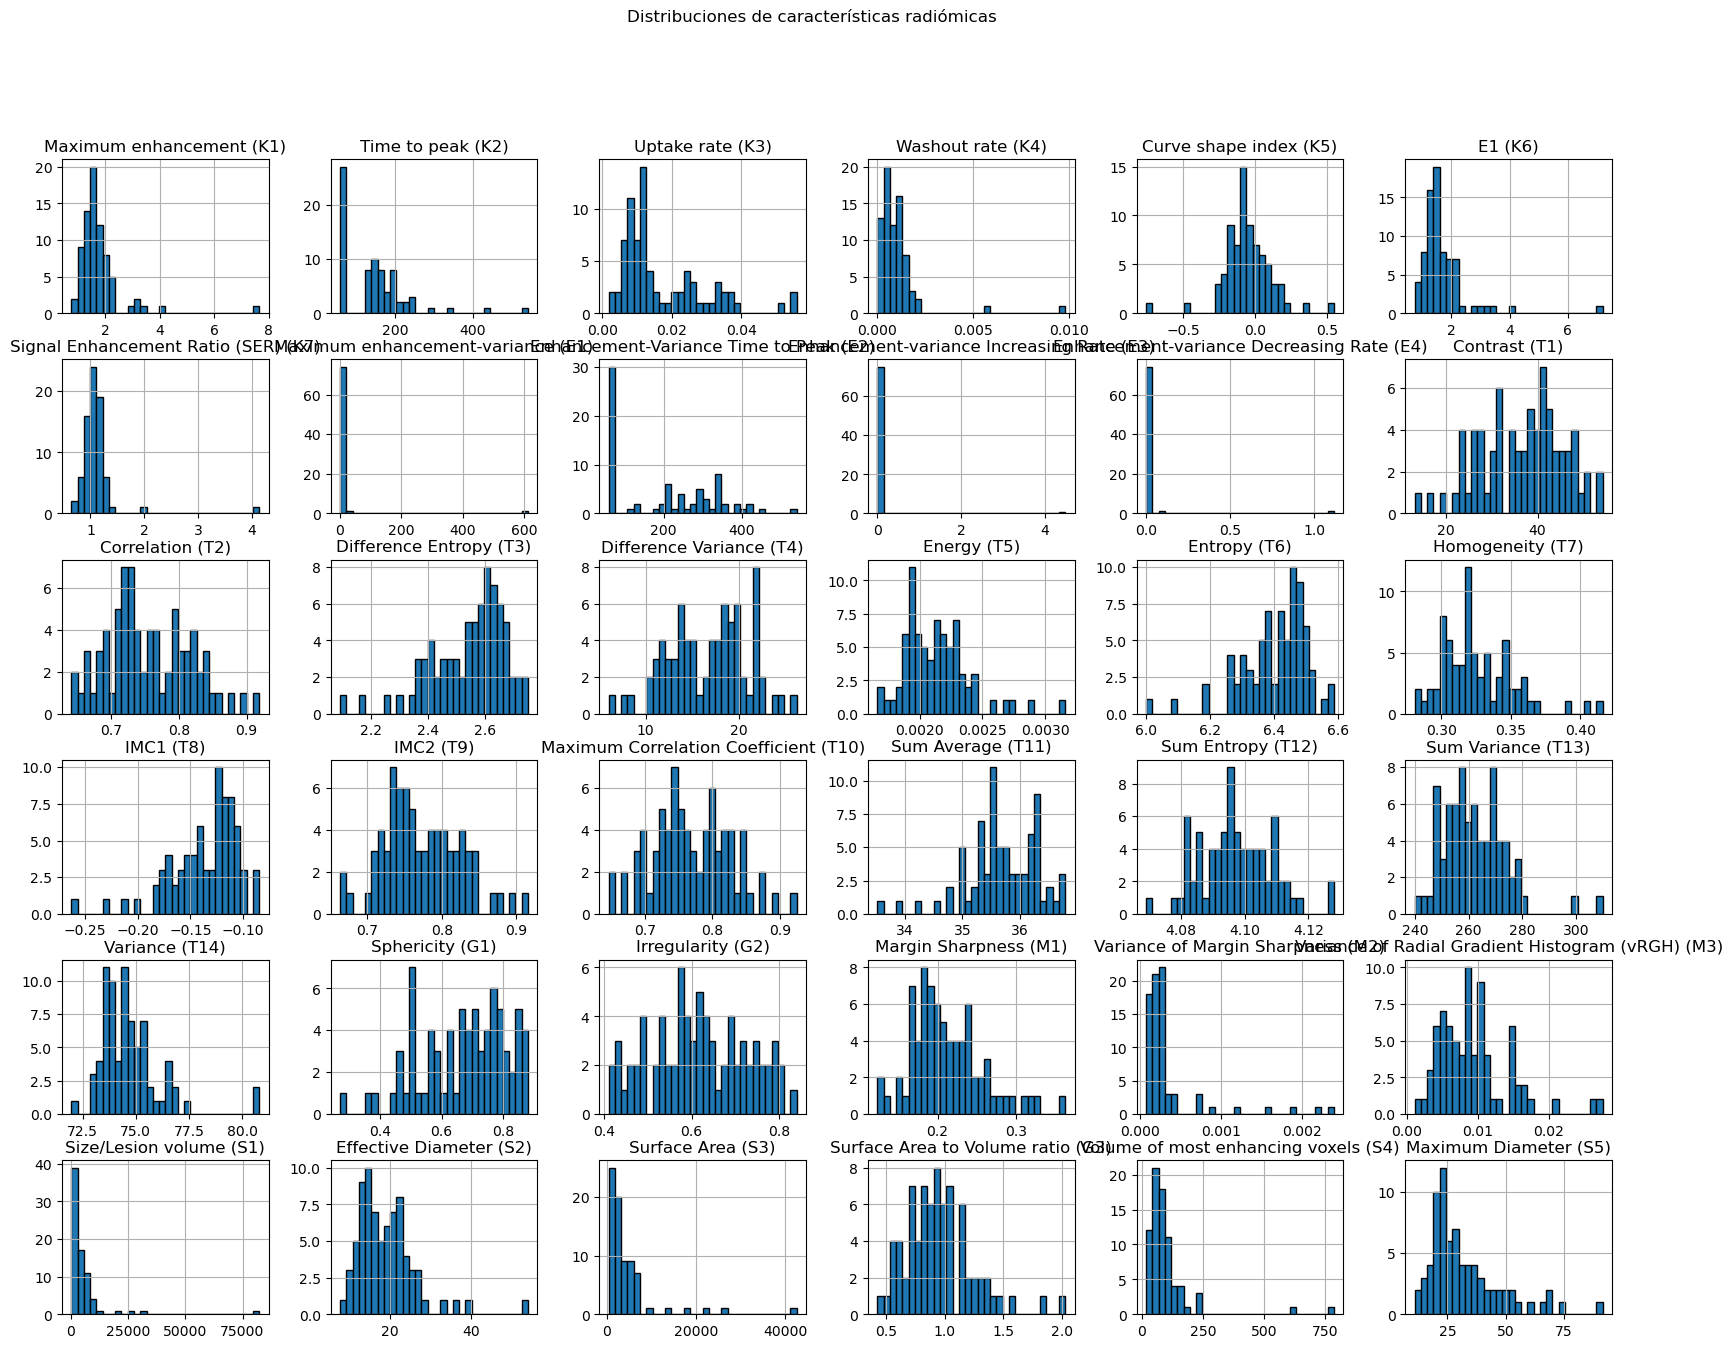

In [23]:
print("\nVisualización de distribuciones de las características:")
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distribuciones de características radiómicas")
plt.show()

In [28]:
numeric_data = data.select_dtypes(include=[np.number])

excluded_columns = [col for col in data.columns if col not in numeric_data.columns]
print("Columnas excluidas (no numéricas):", excluded_columns)

Columnas excluidas (no numéricas): ['Lesion Name', 'Pam50.Call']


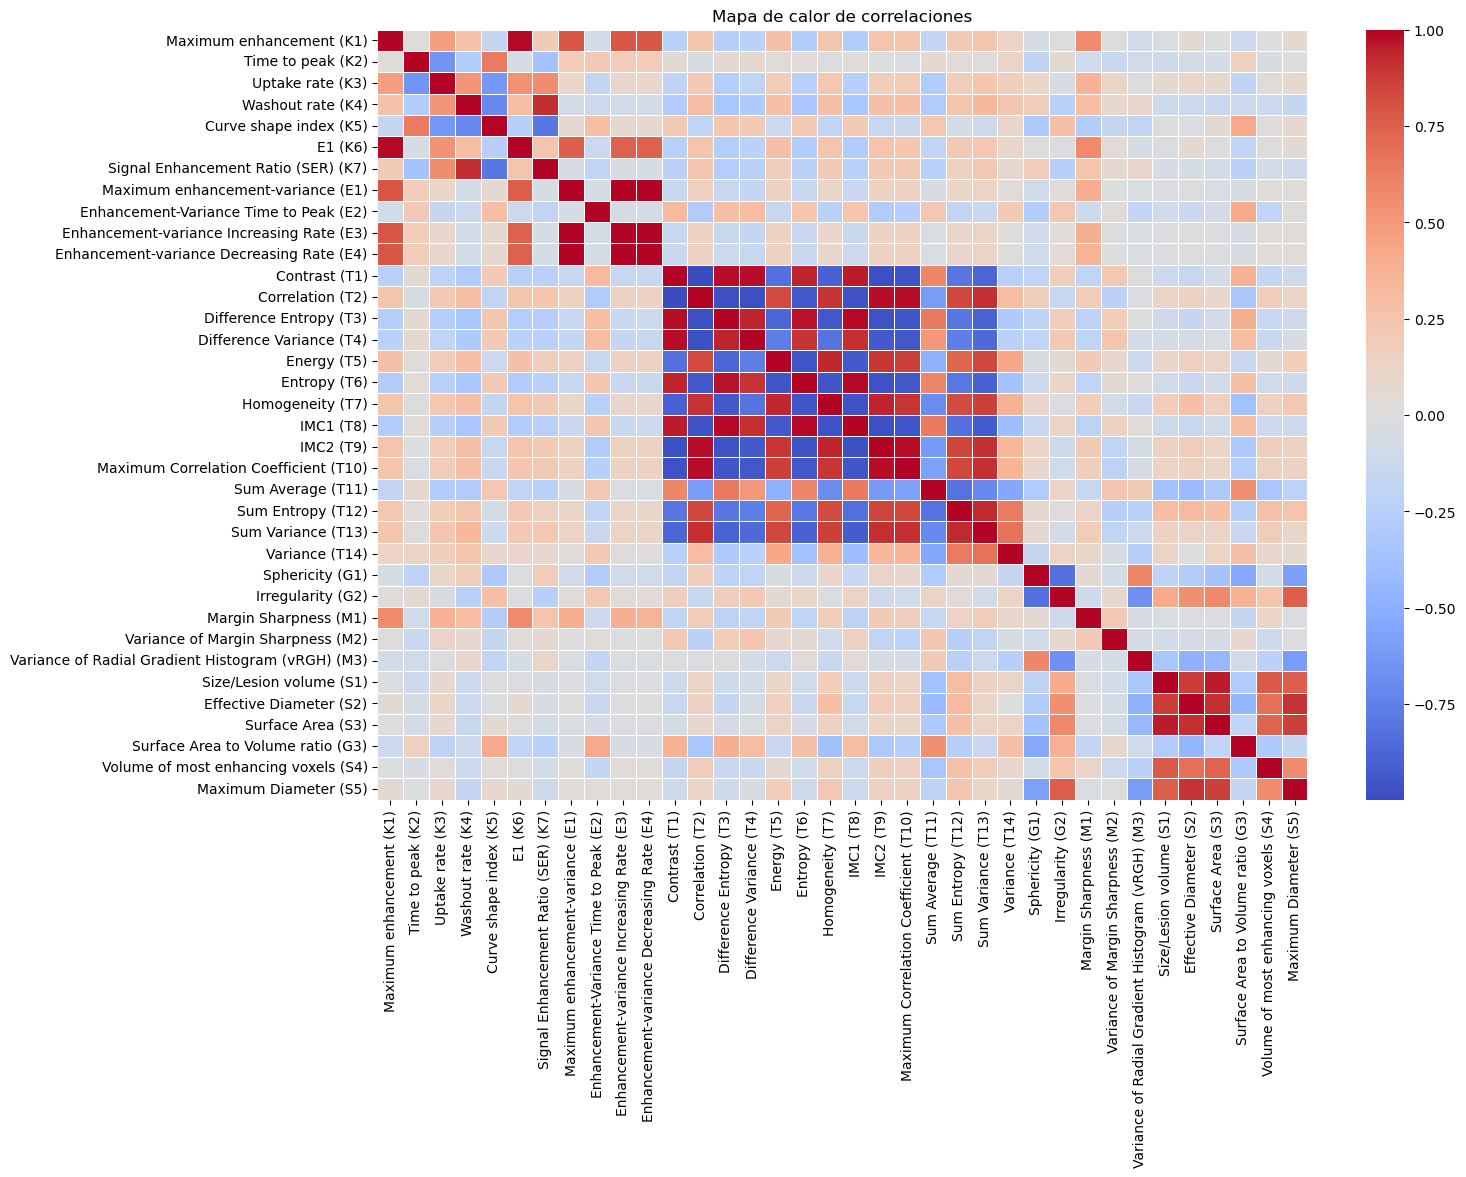

In [29]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


Visualización de valores atípicos:


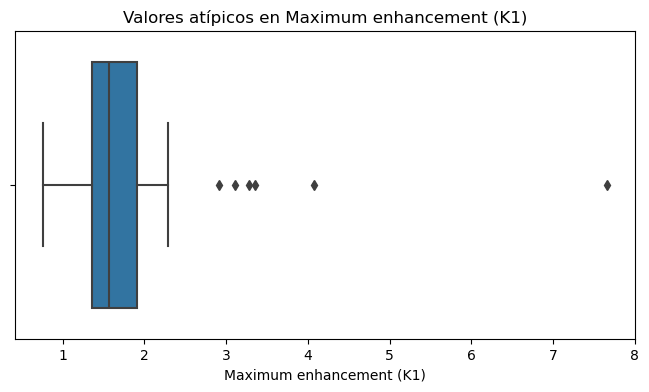

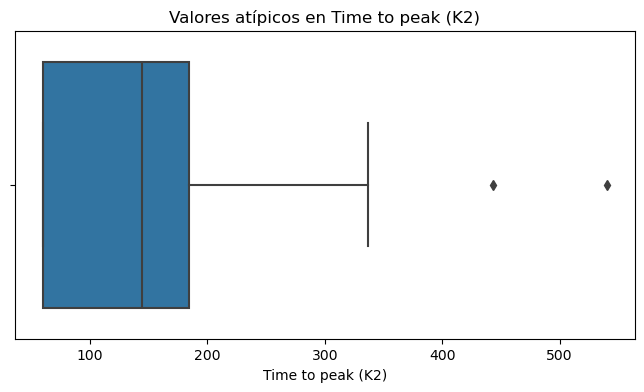

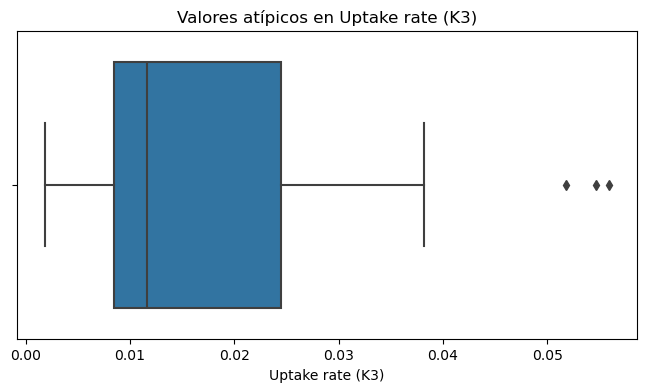

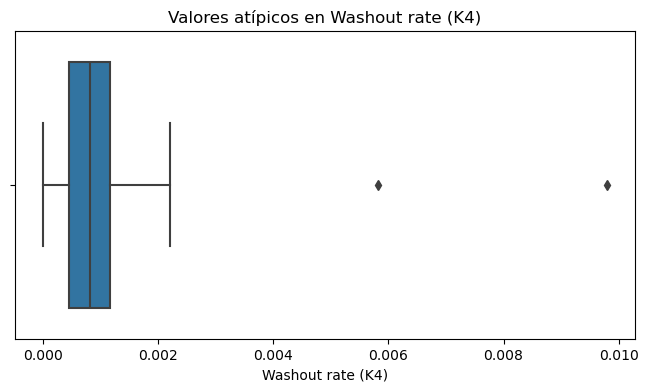

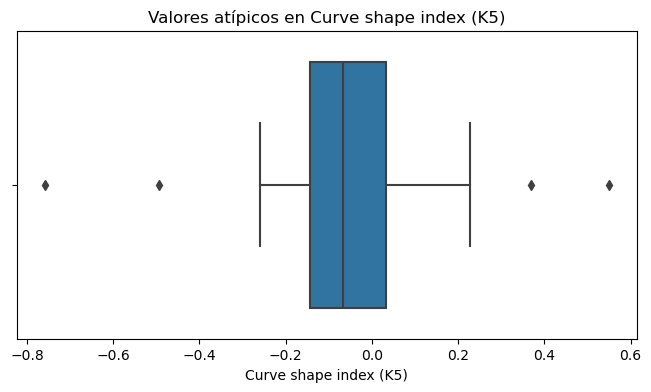

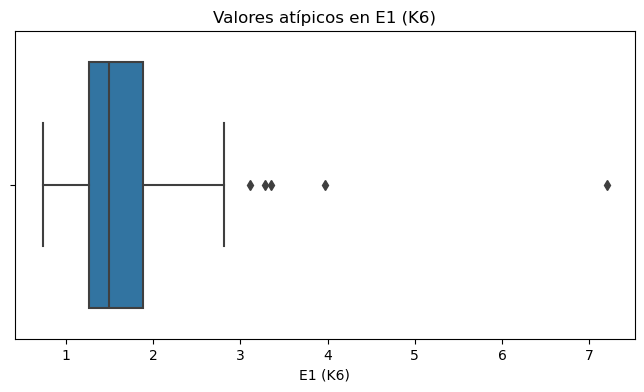

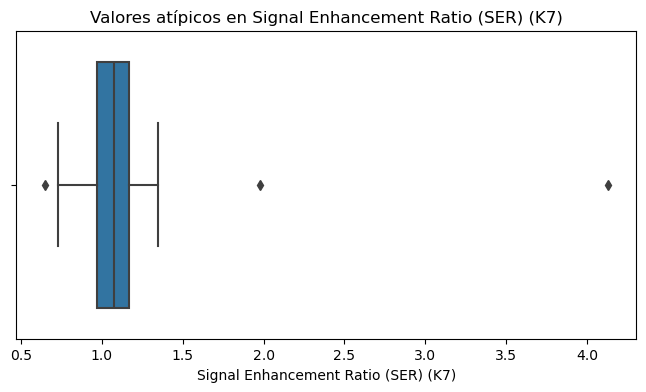

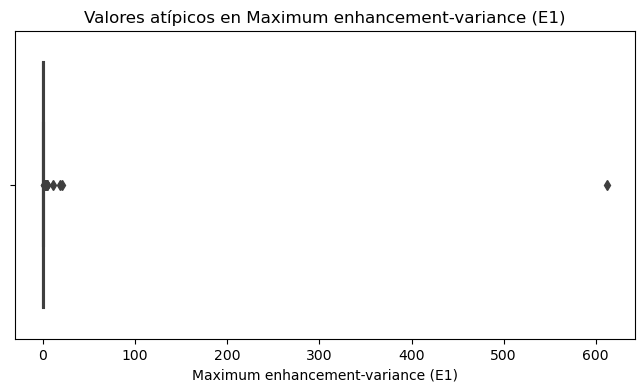

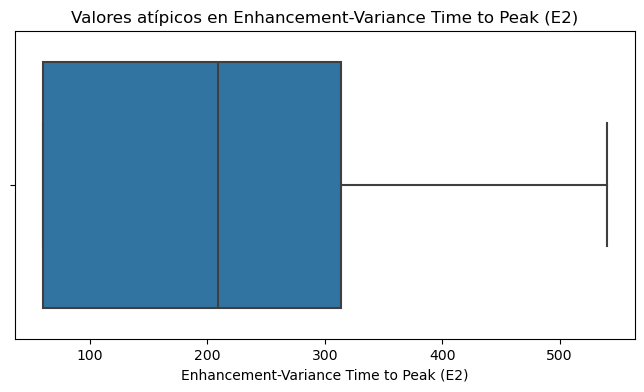

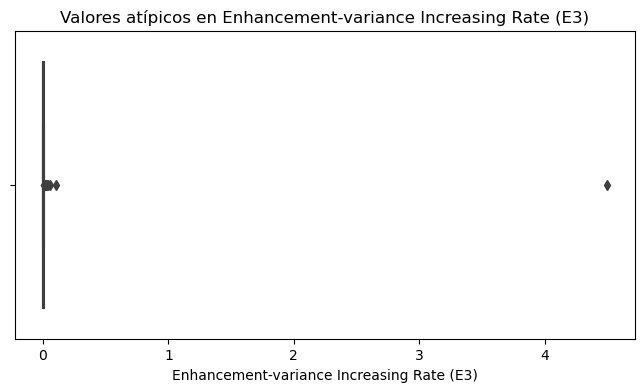

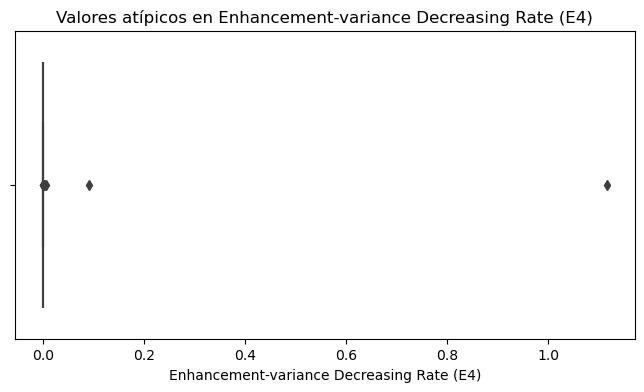

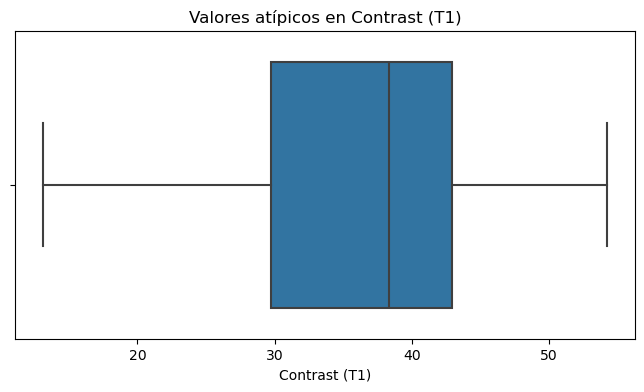

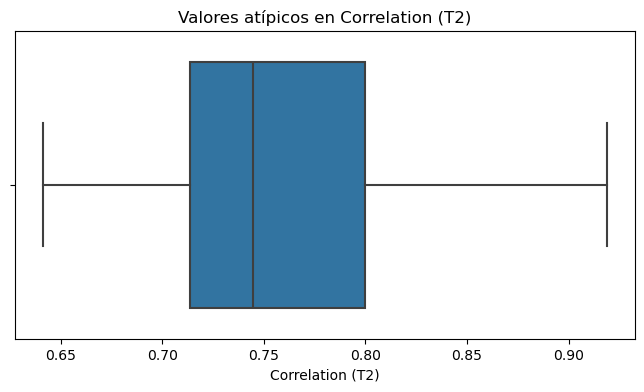

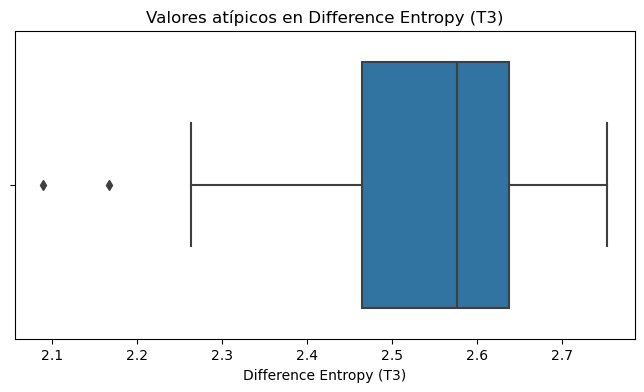

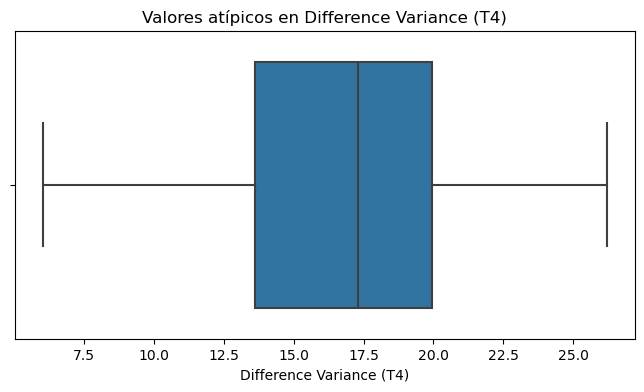

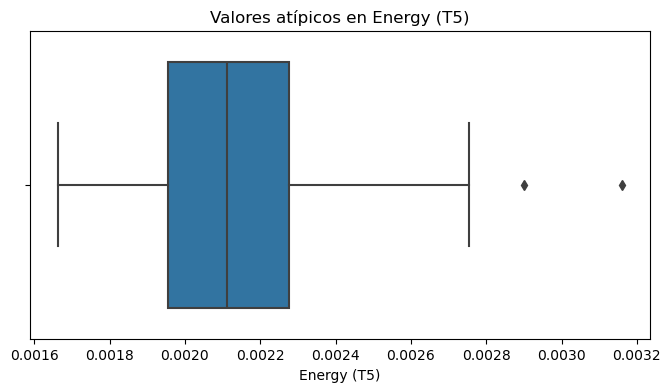

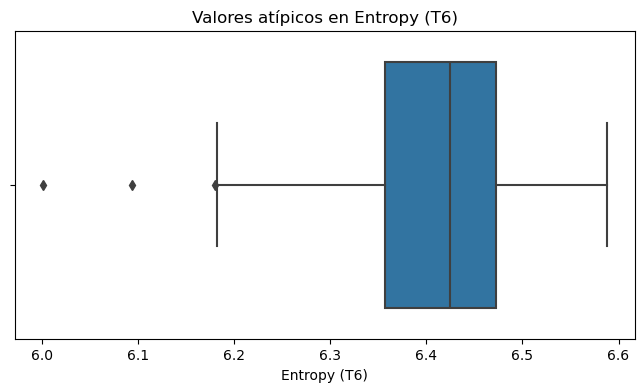

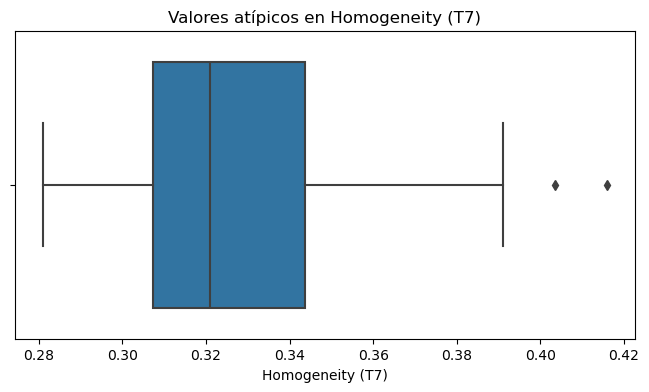

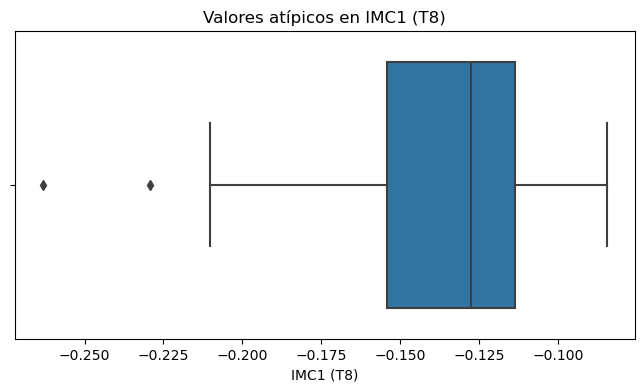

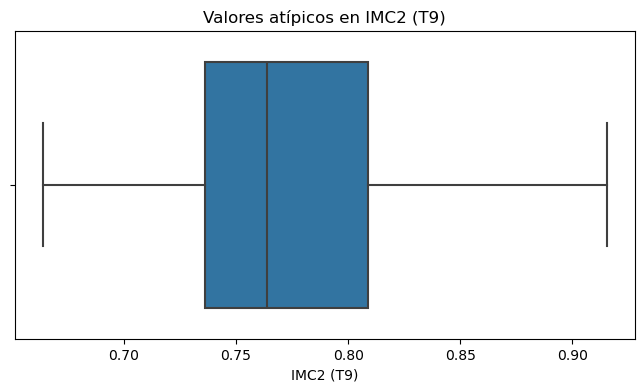

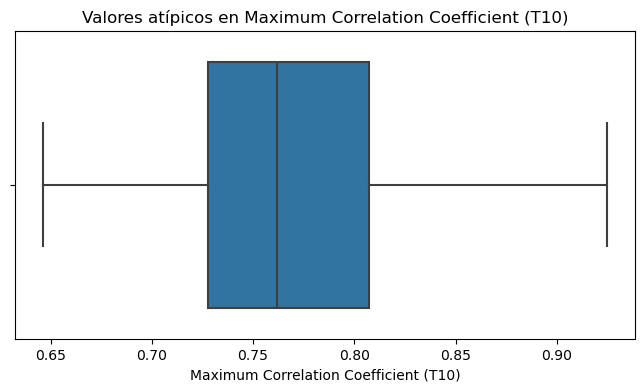

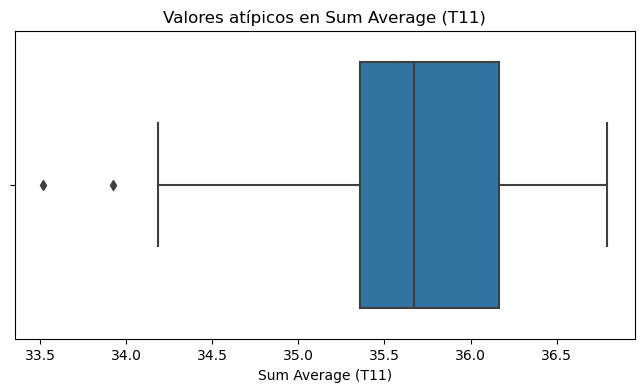

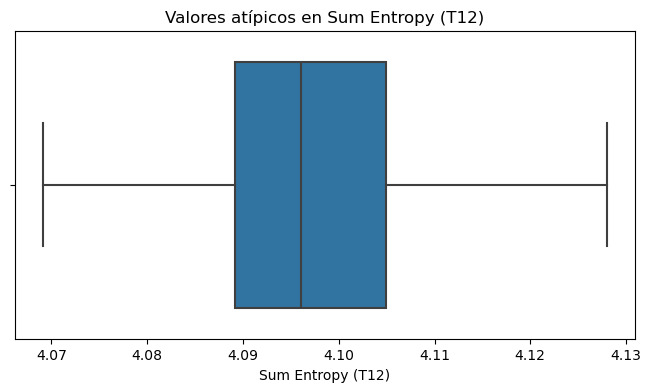

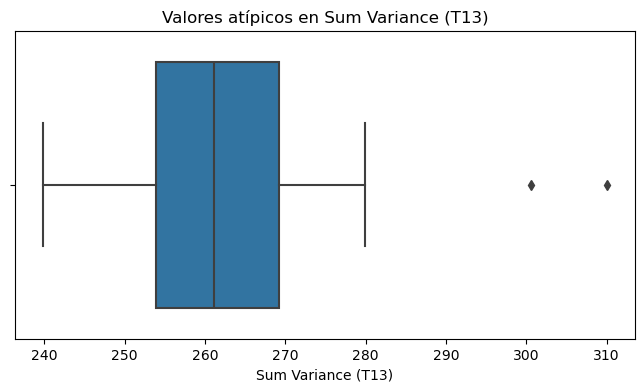

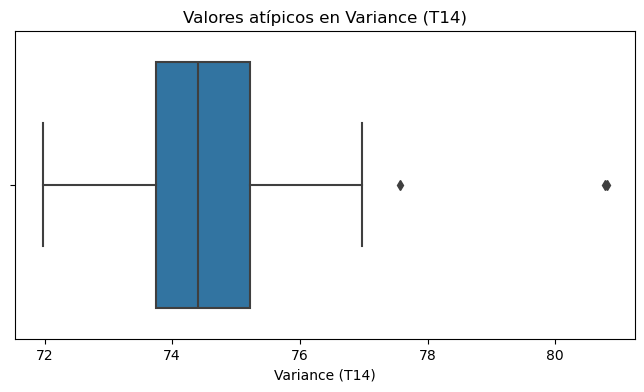

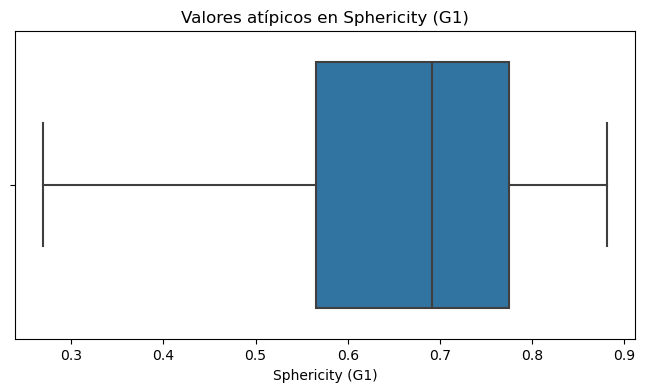

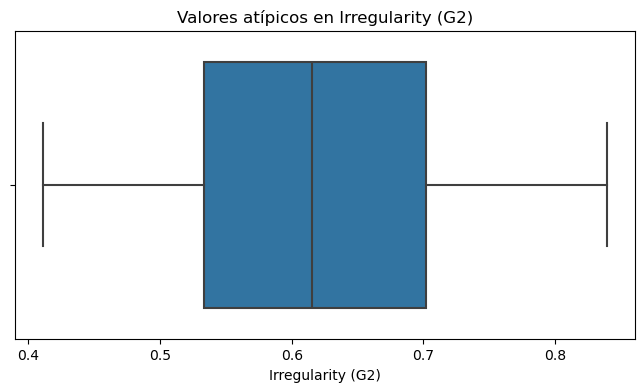

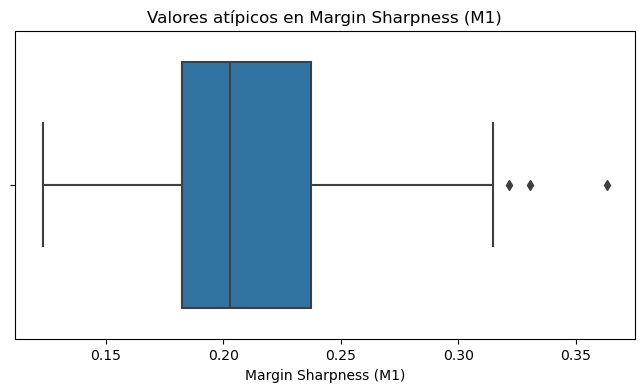

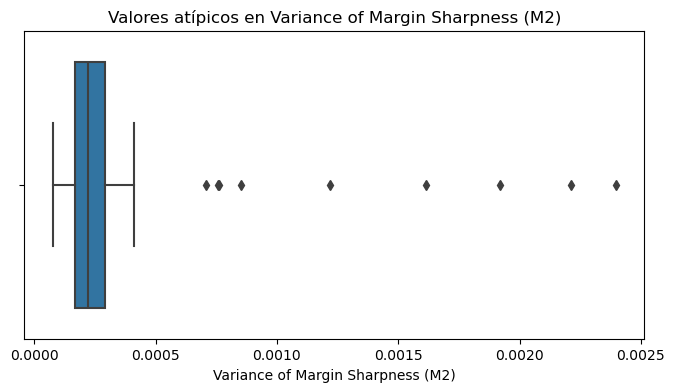

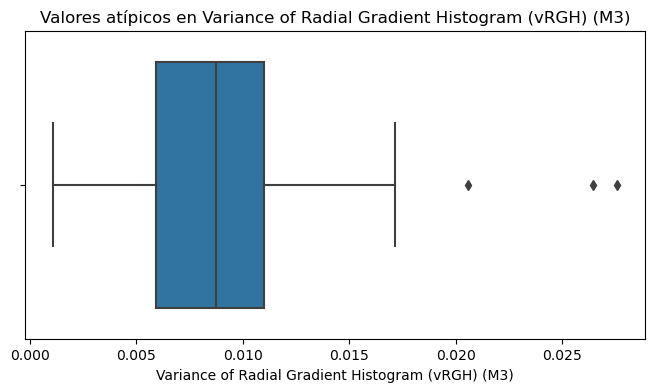

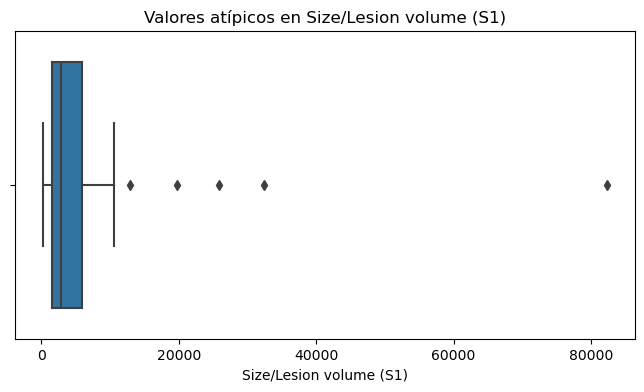

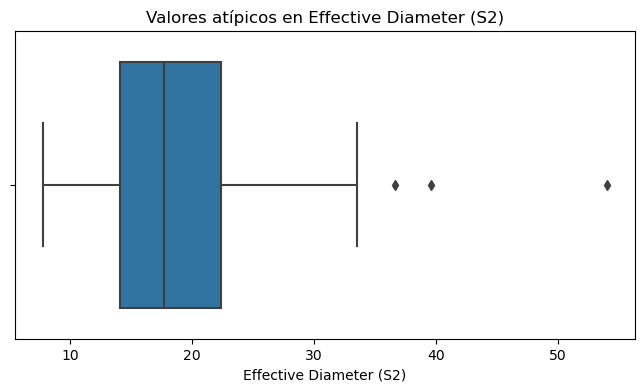

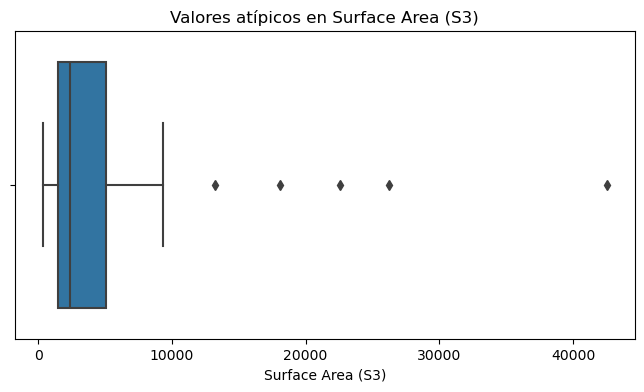

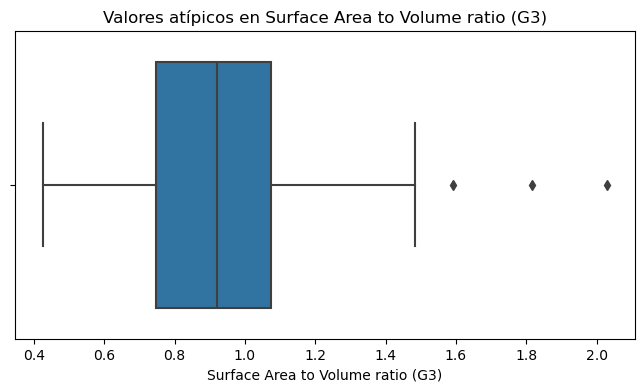

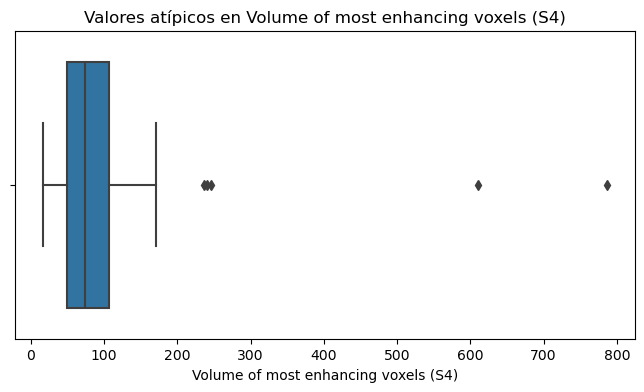

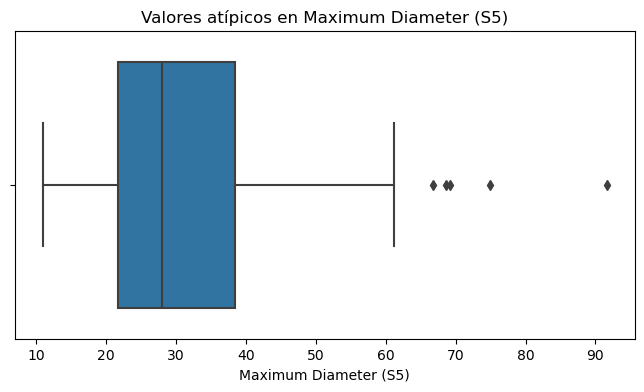

In [31]:
print("\nVisualización de valores atípicos:")
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numeric_data[column])
    plt.title(f"Valores atípicos en {column}")
    plt.show()

In [32]:
low_variance_features = numeric_data.var()[numeric_data.var() < 0.01]
print("\nCaracterísticas con baja varianza:")
print(low_variance_features)


Características con baja varianza:
Uptake rate (K3)                                     1.484438e-04
Washout rate (K4)                                    1.644524e-06
Correlation (T2)                                     3.803387e-03
Energy (T5)                                          6.778647e-08
Homogeneity (T7)                                     6.604822e-04
IMC1 (T8)                                            1.066362e-03
IMC2 (T9)                                            2.638635e-03
Maximum Correlation Coefficient (T10)                3.371875e-03
Sum Entropy (T12)                                    1.276720e-04
Margin Sharpness (M1)                                2.145073e-03
Variance of Margin Sharpness (M2)                    1.986046e-07
Variance of Radial Gradient Histogram (vRGH) (M3)    2.462926e-05
dtype: float64


## Relation between radiomic features & target class

### ANOVA

In [33]:
data['Pam50.Call'] = data['Pam50.Call'].astype('category')

radiomic_features = data.select_dtypes(include=[np.number])

# Confirmar que las variables están listas
print("Características radiómicas (numéricas):", radiomic_features.columns)
print("Clases en Pam50.Call:", data['Pam50.Call'].unique())

Características radiómicas (numéricas): Index(['Maximum enhancement (K1)', 'Time to peak (K2)', 'Uptake rate (K3)',
       'Washout rate (K4)', 'Curve shape index (K5)', 'E1 (K6)',
       'Signal Enhancement Ratio (SER) (K7)',
       'Maximum enhancement-variance (E1)',
       'Enhancement-Variance Time to Peak (E2)',
       'Enhancement-variance Increasing Rate (E3)',
       'Enhancement-variance Decreasing Rate (E4)', 'Contrast (T1)',
       'Correlation (T2)', 'Difference Entropy (T3)',
       'Difference Variance (T4)', 'Energy (T5)', 'Entropy (T6)',
       'Homogeneity (T7)', 'IMC1 (T8)', 'IMC2 (T9)',
       'Maximum Correlation Coefficient (T10)', 'Sum Average (T11)',
       'Sum Entropy (T12)', 'Sum Variance (T13)', 'Variance (T14)',
       'Sphericity (G1)', 'Irregularity (G2)', 'Margin Sharpness (M1)',
       'Variance of Margin Sharpness (M2)',
       'Variance of Radial Gradient Histogram (vRGH) (M3)',
       'Size/Lesion volume (S1)', 'Effective Diameter (S2)',
       'Surf

In [34]:
from scipy.stats import f_oneway, kruskal

for column in radiomic_features.columns:
    groups = [radiomic_features[data['Pam50.Call'] == label][column] for label in data['Pam50.Call'].cat.categories]
    anova_p_value = f_oneway(*groups).pvalue
    print(f"{column}: ANOVA p-value = {anova_p_value}")
    
    if anova_p_value < 0.05: 
        kruskal_p_value = kruskal(*groups).pvalue
        print(f"    {column}: Kruskal-Wallis p-value = {kruskal_p_value}")

Maximum enhancement (K1): ANOVA p-value = 0.9571458780150212
Time to peak (K2): ANOVA p-value = 0.3102198430061423
Uptake rate (K3): ANOVA p-value = 0.08890323878813085
Washout rate (K4): ANOVA p-value = 0.8342567068839264
Curve shape index (K5): ANOVA p-value = 0.9949629445602769
E1 (K6): ANOVA p-value = 0.942843100342041
Signal Enhancement Ratio (SER) (K7): ANOVA p-value = 0.9362060616145176
Maximum enhancement-variance (E1): ANOVA p-value = 0.9315750380282524
Enhancement-Variance Time to Peak (E2): ANOVA p-value = 0.7614801451330613
Enhancement-variance Increasing Rate (E3): ANOVA p-value = 0.9353976219254471
Enhancement-variance Decreasing Rate (E4): ANOVA p-value = 0.9535190305448353
Contrast (T1): ANOVA p-value = 0.32944768048034434
Correlation (T2): ANOVA p-value = 0.3321414017279728
Difference Entropy (T3): ANOVA p-value = 0.4835205549594259
Difference Variance (T4): ANOVA p-value = 0.13110939606432748
Energy (T5): ANOVA p-value = 0.20969288701675196
Entropy (T6): ANOVA p-value

### Correlations

In [35]:
data['Pam50_numeric'] = data['Pam50.Call'].cat.codes

correlations = radiomic_features.corrwith(data['Pam50_numeric'])
print("Correlaciones con Pam50.Call (numérica):")
print(correlations)

Correlaciones con Pam50.Call (numérica):
Maximum enhancement (K1)                             0.016463
Time to peak (K2)                                    0.028987
Uptake rate (K3)                                     0.045989
Washout rate (K4)                                    0.039285
Curve shape index (K5)                               0.018777
E1 (K6)                                              0.007514
Signal Enhancement Ratio (SER) (K7)                  0.020430
Maximum enhancement-variance (E1)                    0.018165
Enhancement-Variance Time to Peak (E2)              -0.113827
Enhancement-variance Increasing Rate (E3)            0.021479
Enhancement-variance Decreasing Rate (E4)            0.003735
Contrast (T1)                                       -0.128908
Correlation (T2)                                     0.123185
Difference Entropy (T3)                             -0.104406
Difference Variance (T4)                            -0.148595
Energy (T5)                  

### Box Plot per radiomic_feature

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


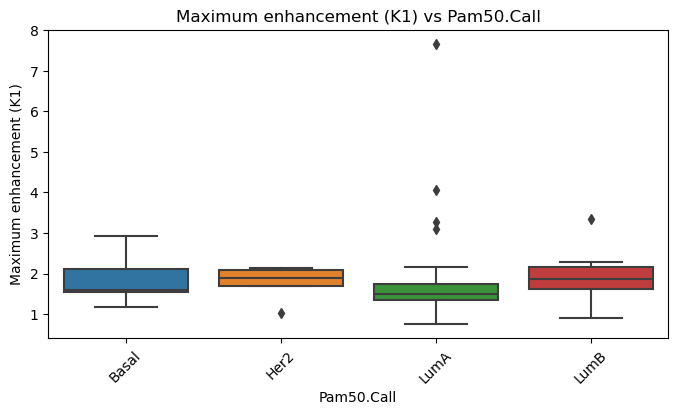

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


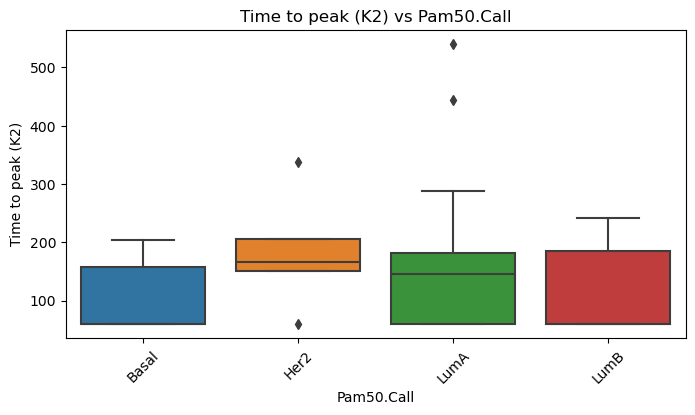

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


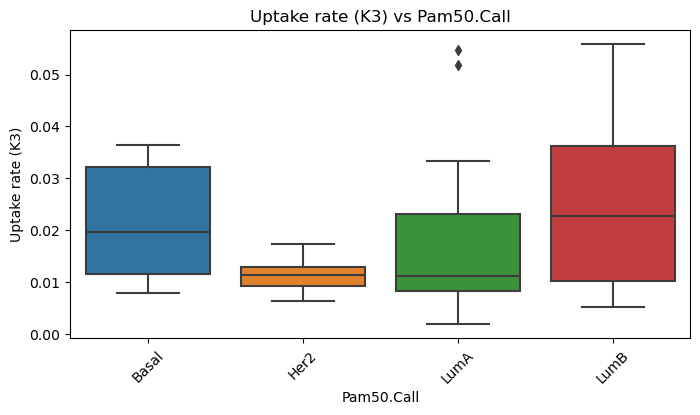

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


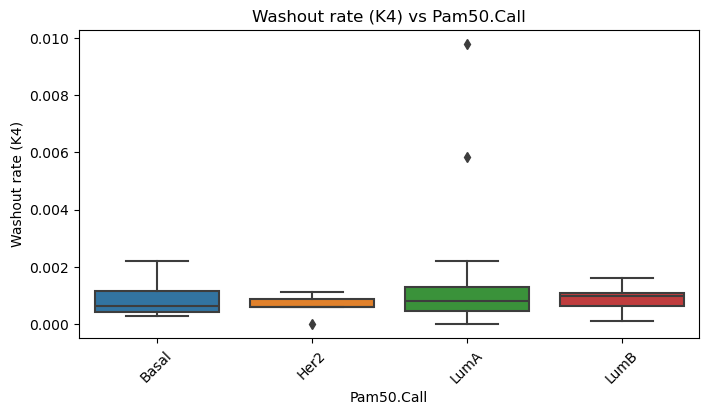

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


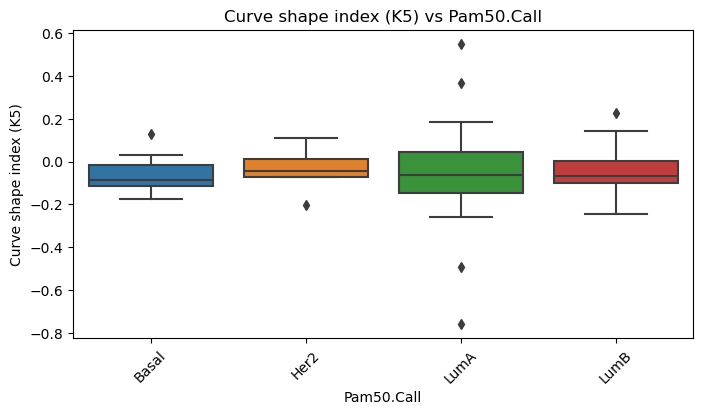

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


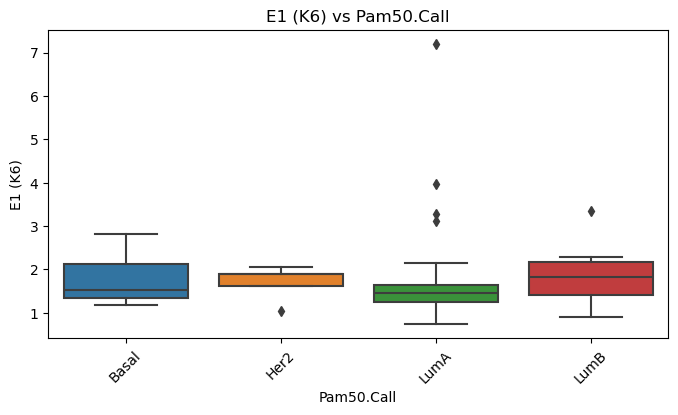

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


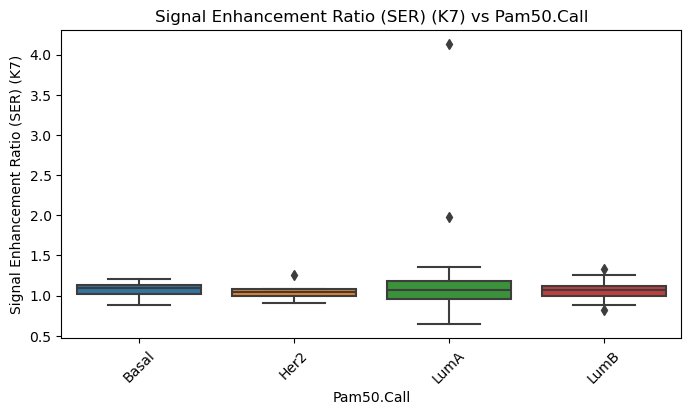

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


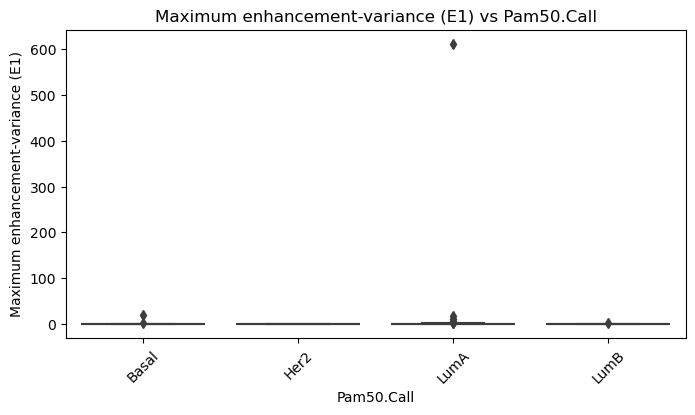

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


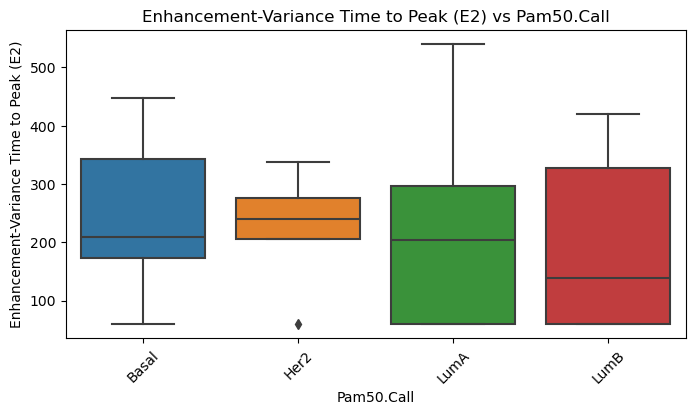

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


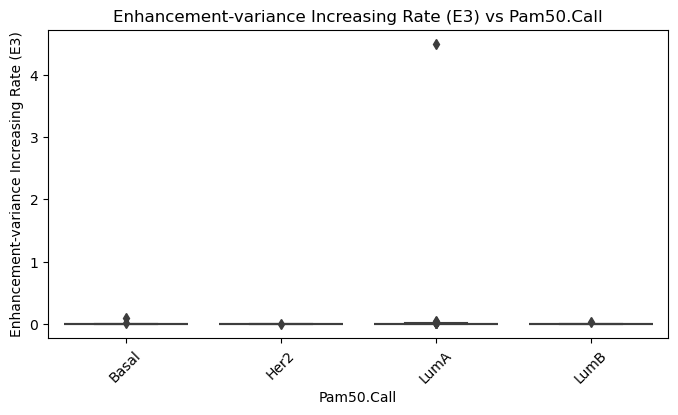

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


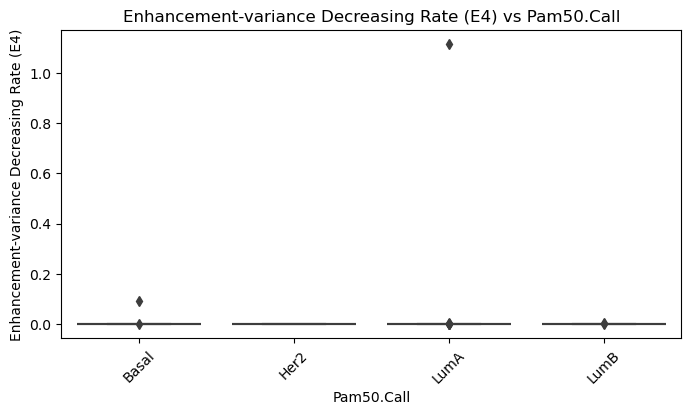

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


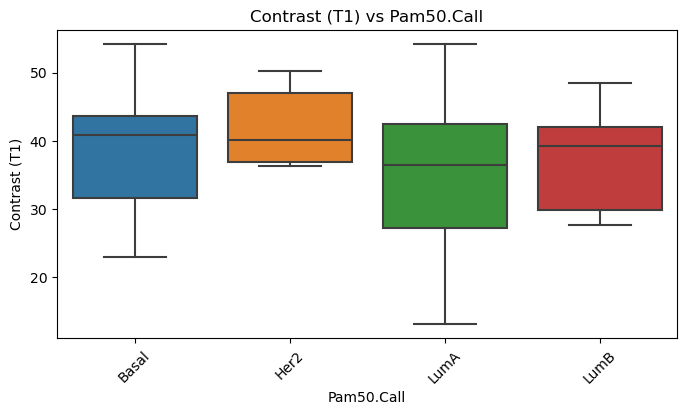

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


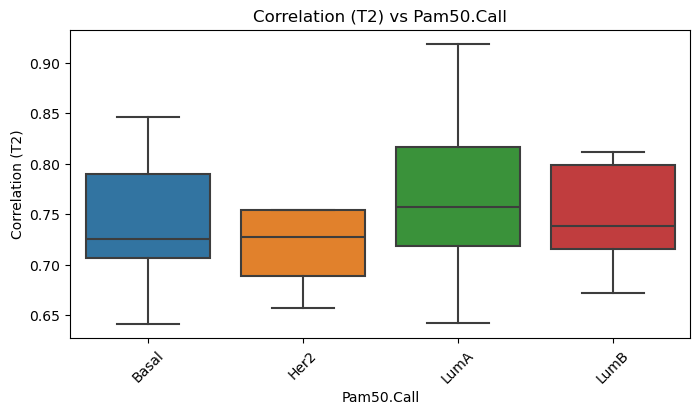

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


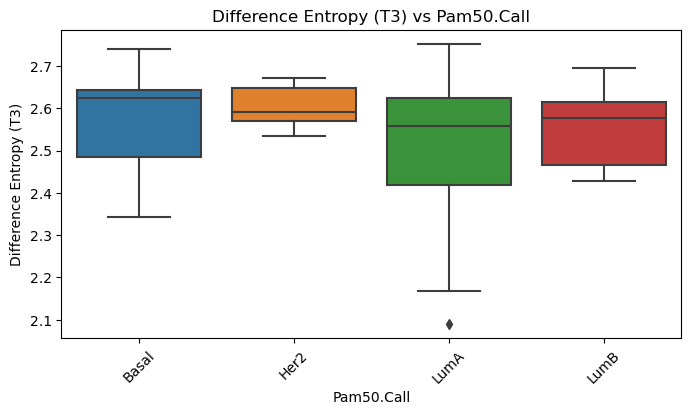

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


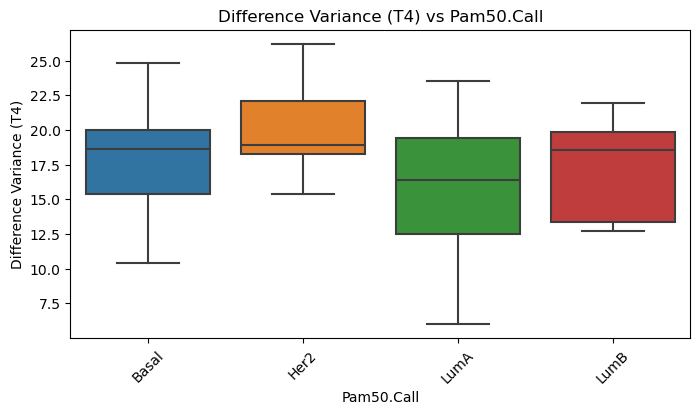

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


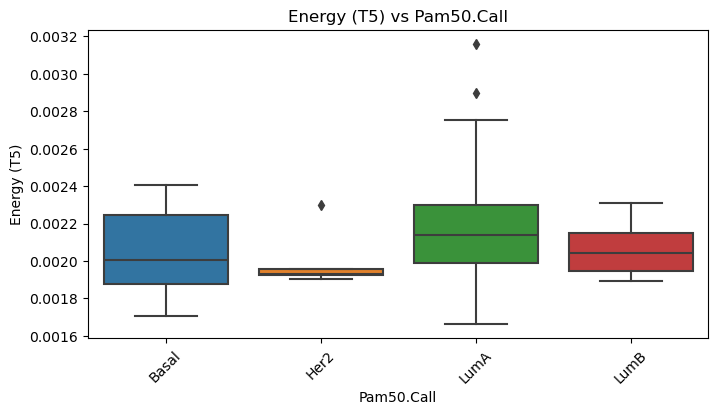

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


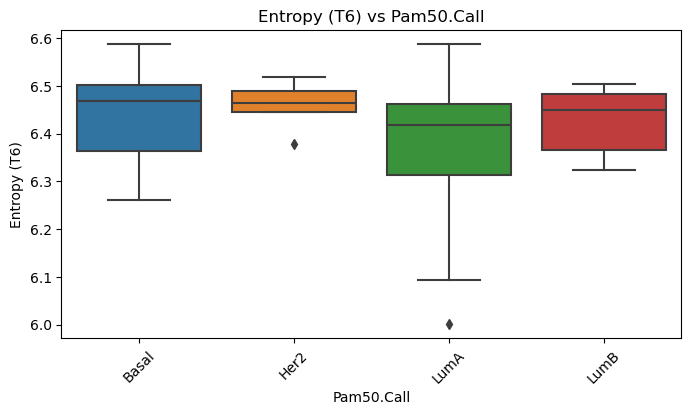

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


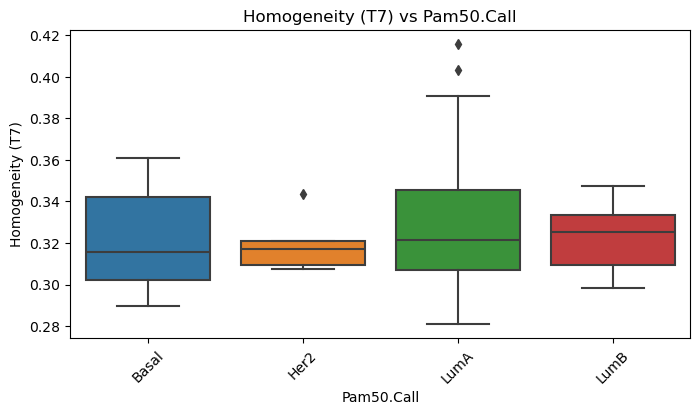

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


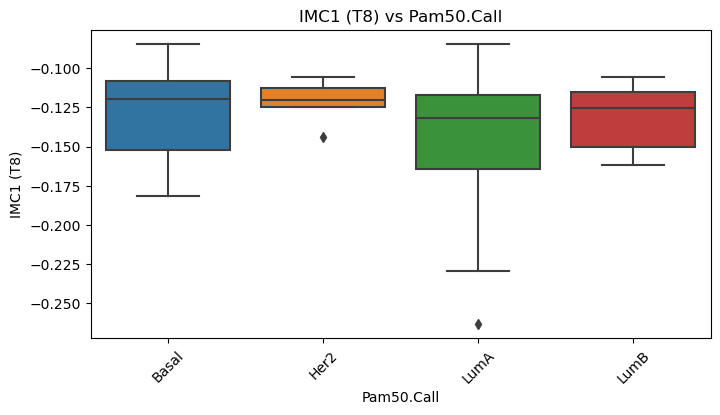

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


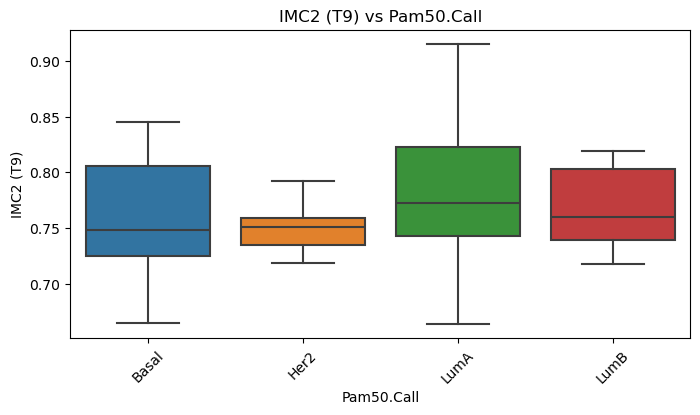

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


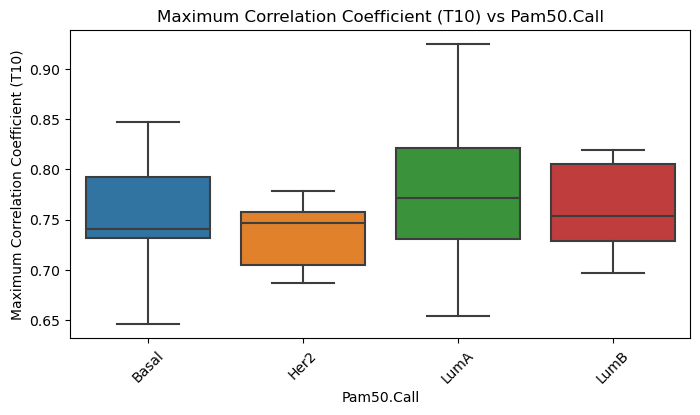

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


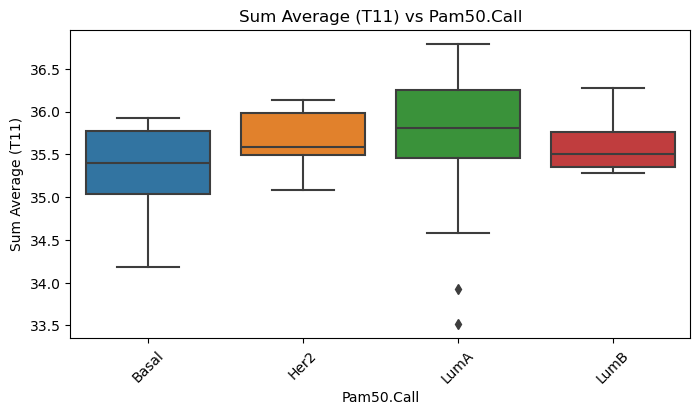

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


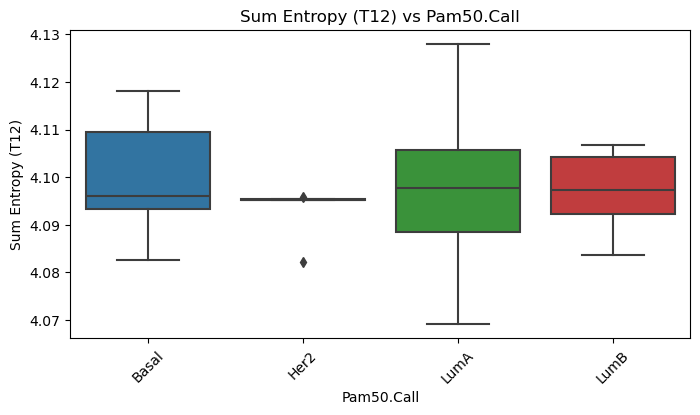

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


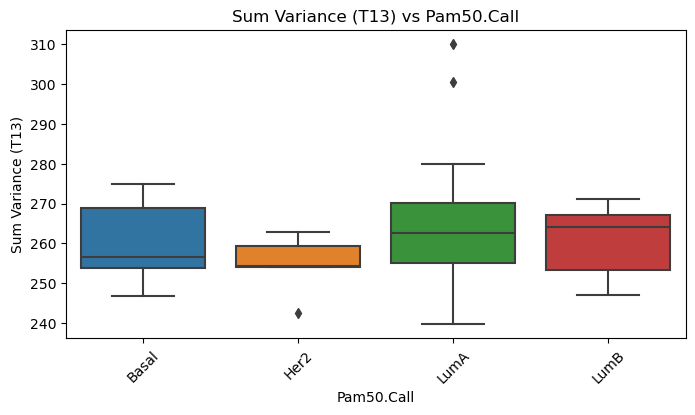

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


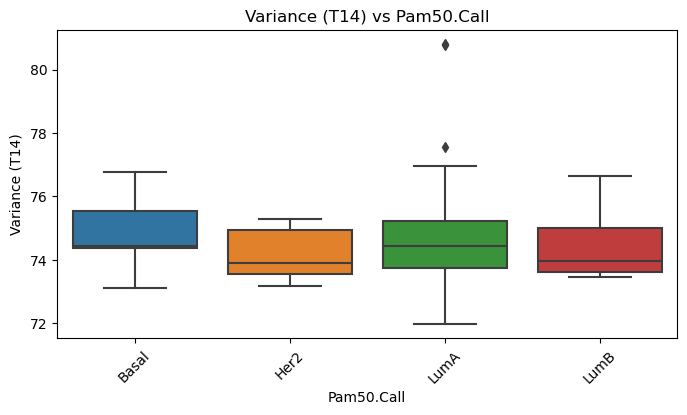

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


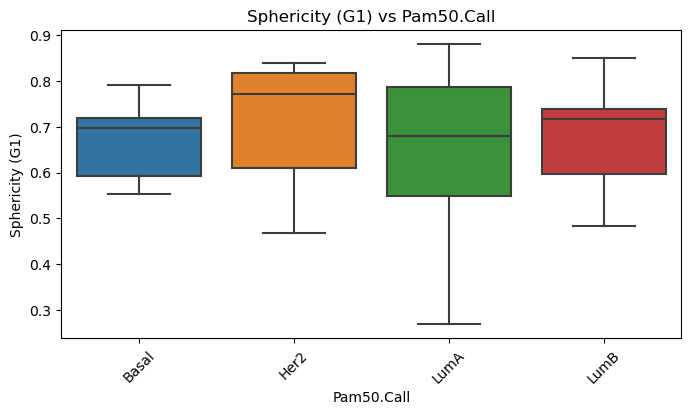

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


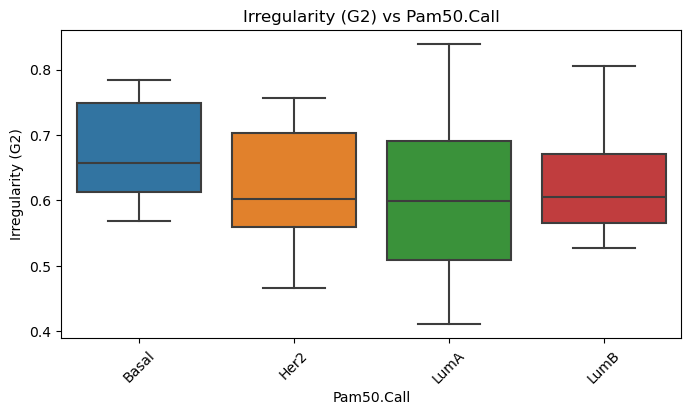

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


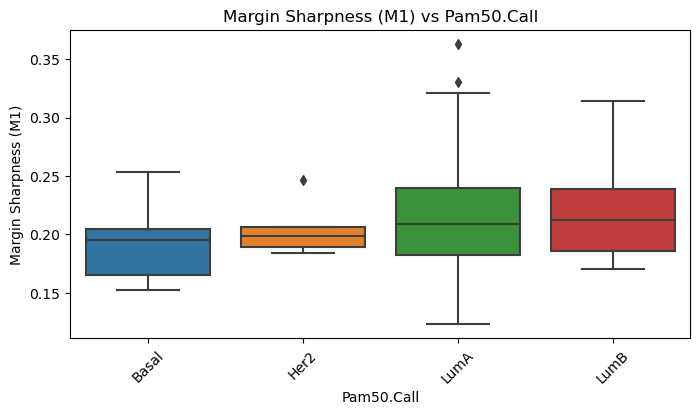

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


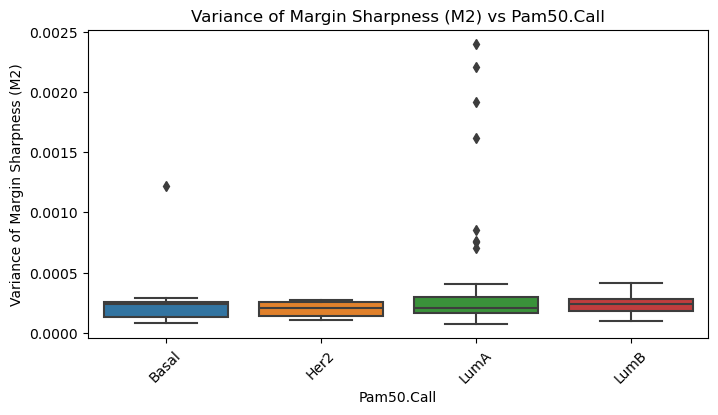

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


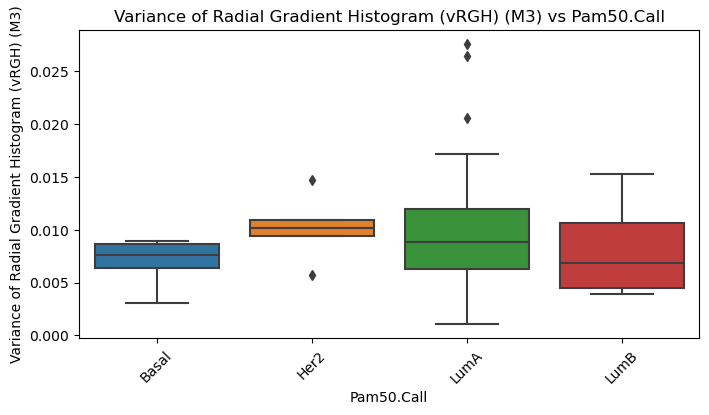

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


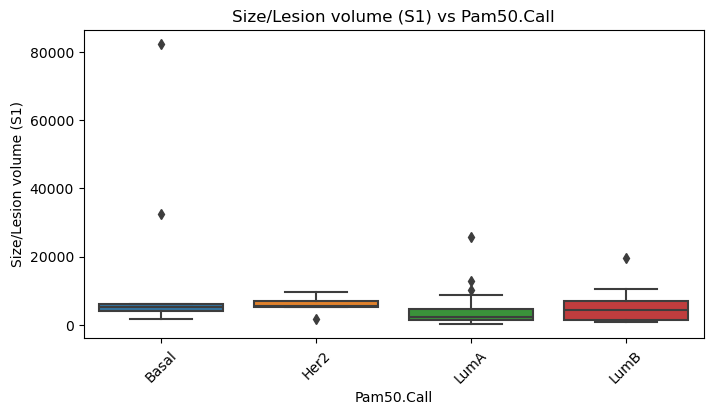

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


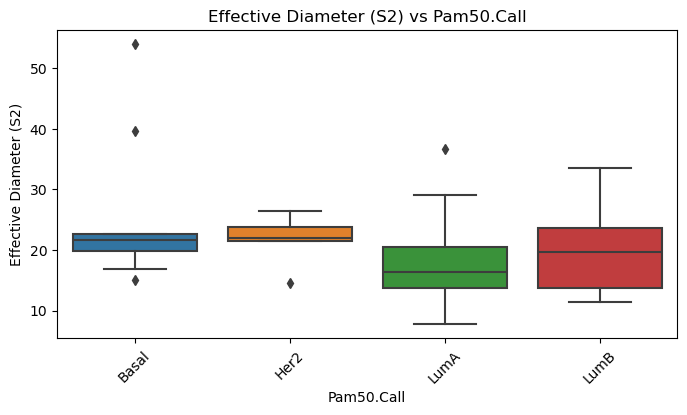

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


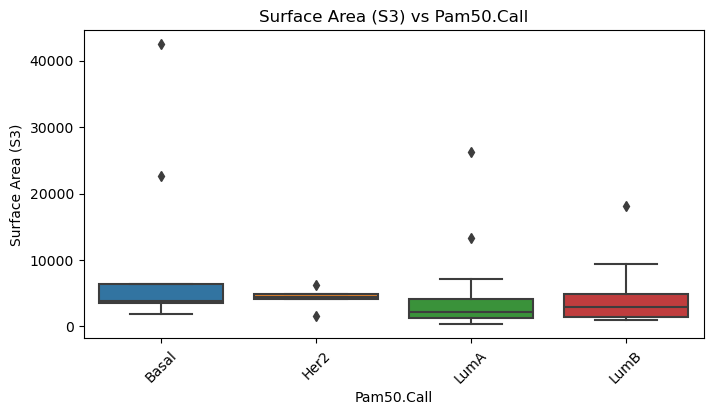

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


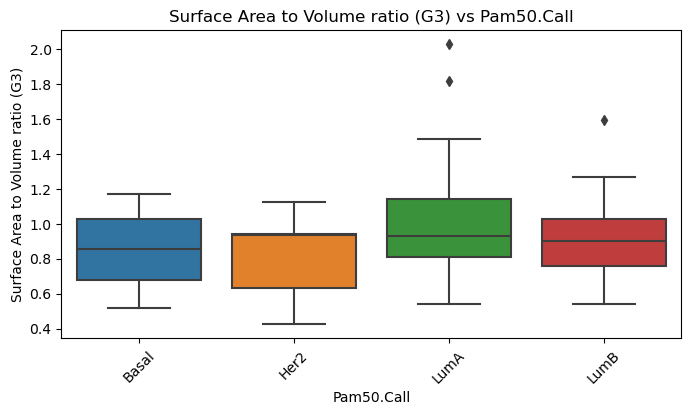

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


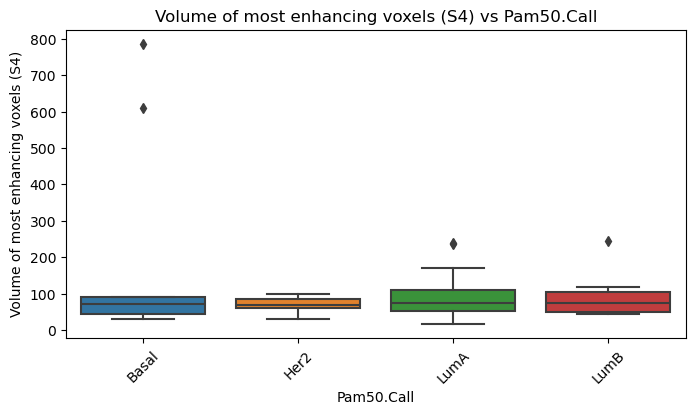

C:\Users\Jose\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


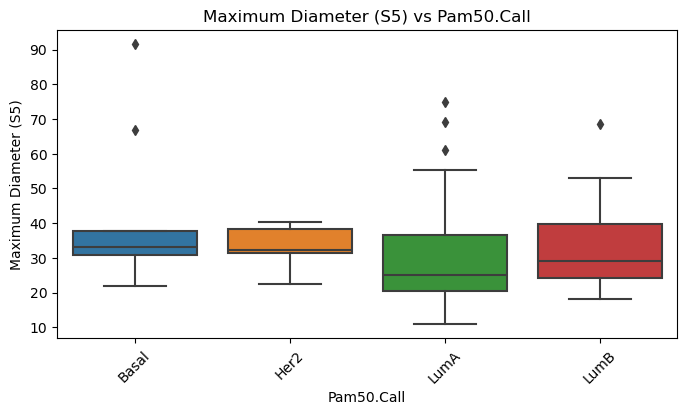

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in radiomic_features.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data['Pam50.Call'], y=radiomic_features[column])
    plt.title(f"{column} vs Pam50.Call")
    plt.xticks(rotation=45)
    plt.show()

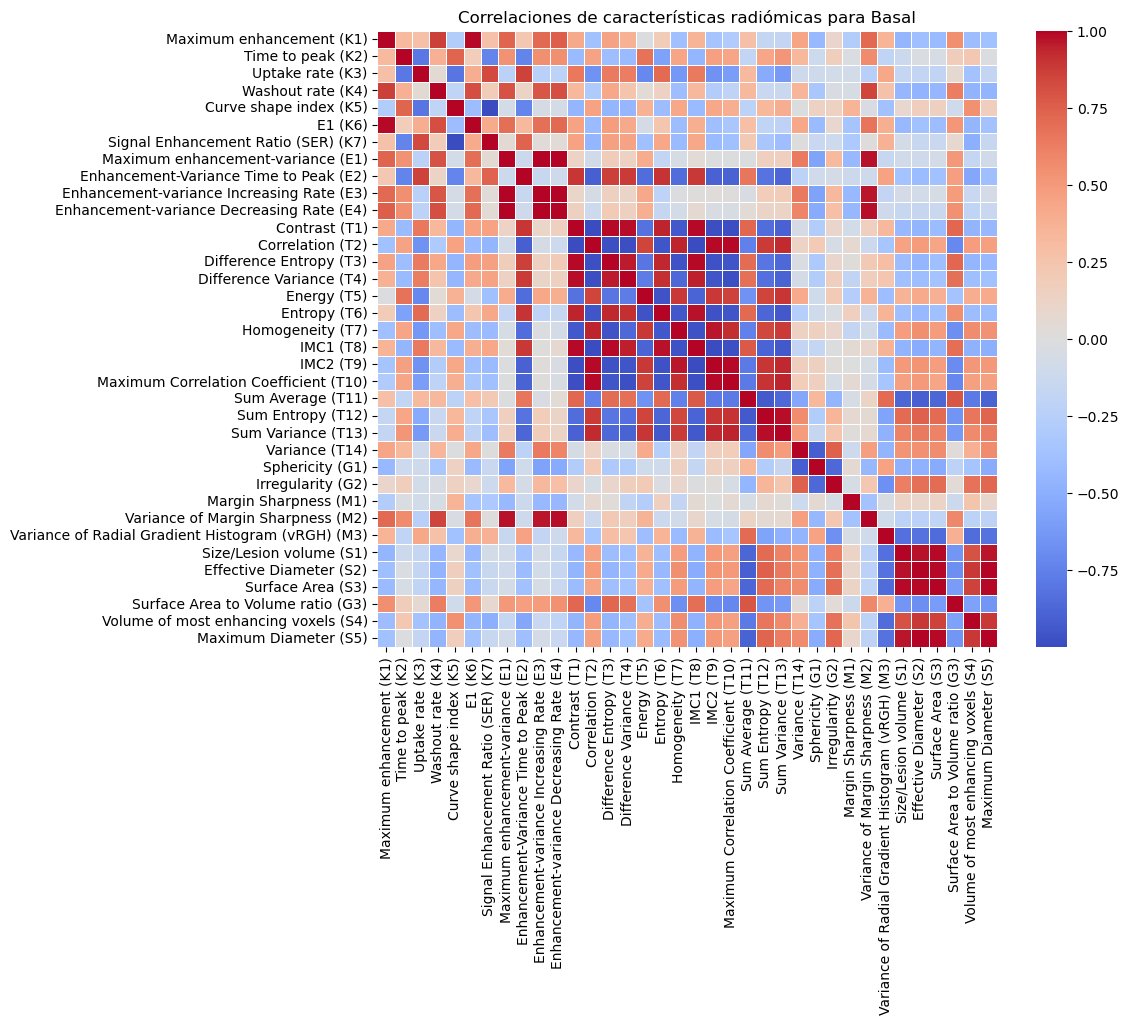

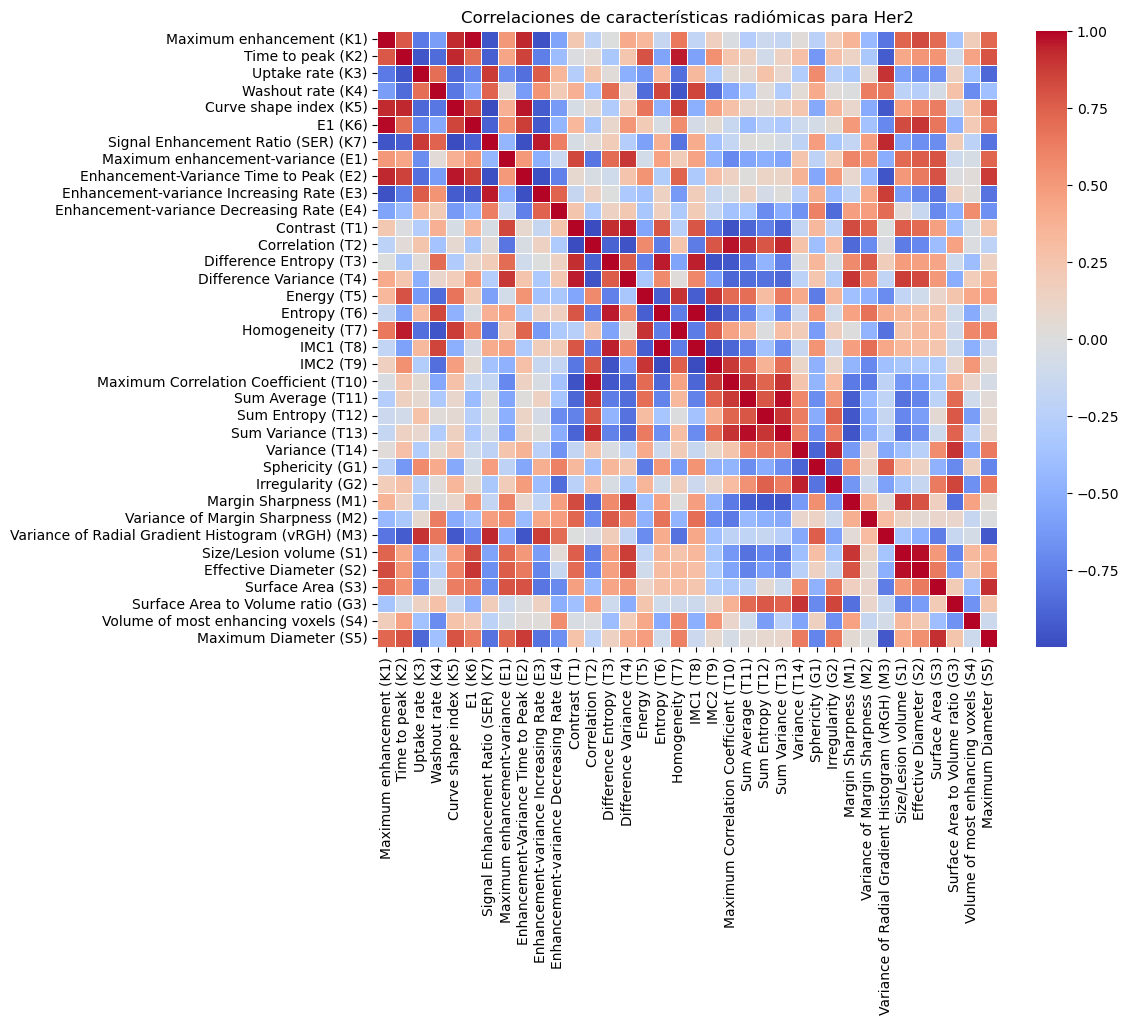

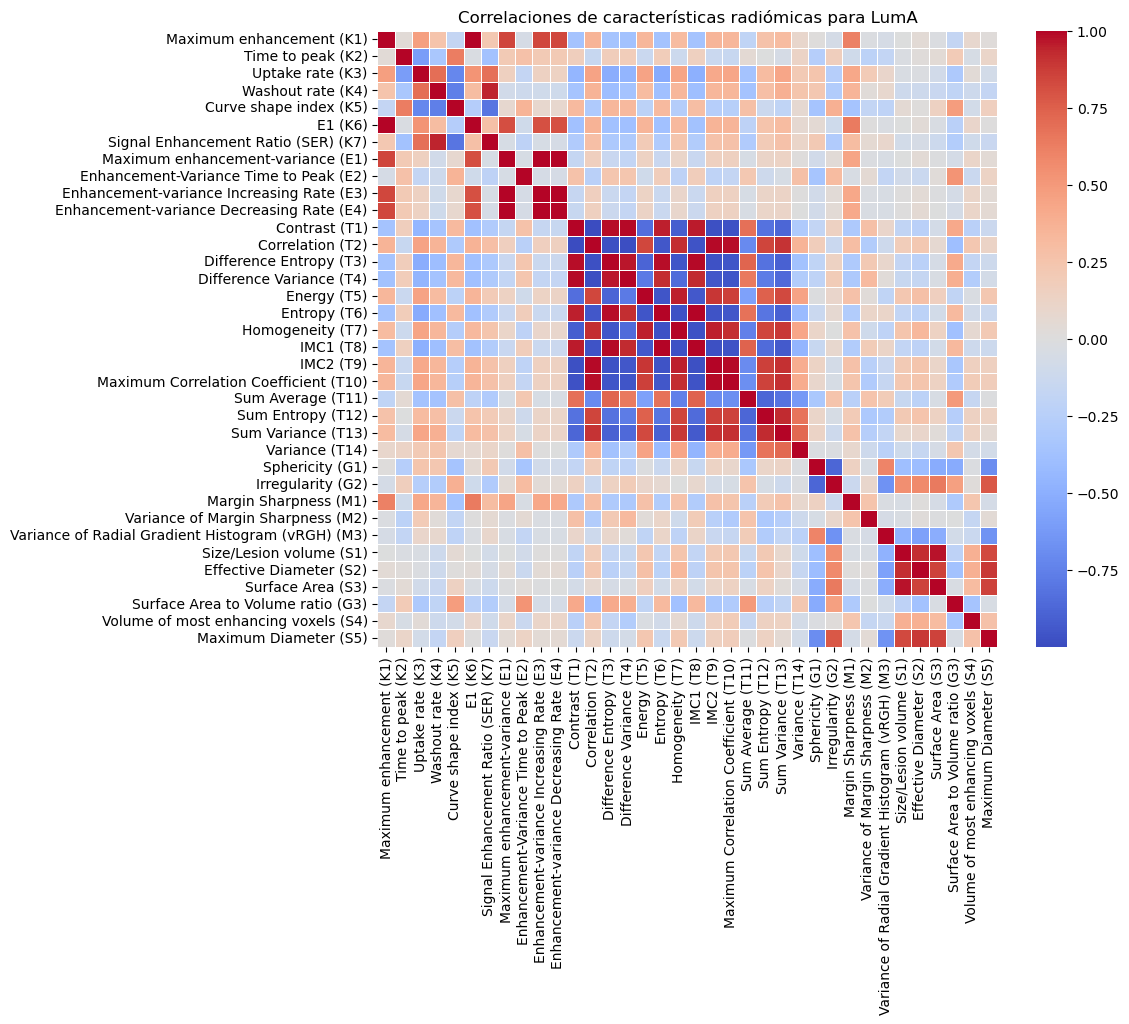

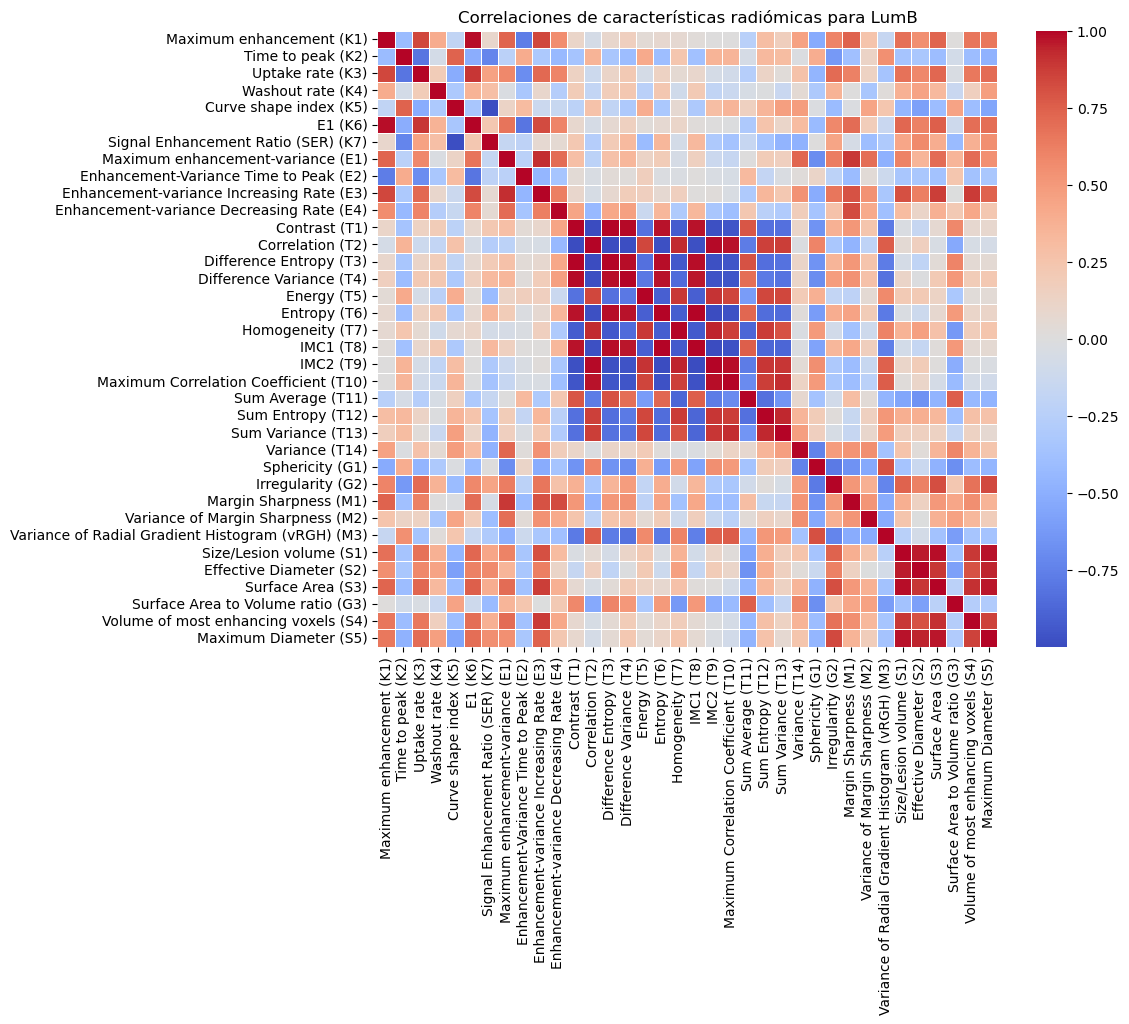

In [37]:
for label in data['Pam50.Call'].cat.categories:
    subset = radiomic_features[data['Pam50.Call'] == label]
    correlation_matrix = subset.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title(f"Correlaciones de características radiómicas para {label}")
    plt.show()